In [ ]:
import random, time
import matplotlib.pyplot as plt

def insertion_sort(arr, left=0, right=None):
    if right is None: right= len(arr)-1
    for i in range(left+1, right+1):
        key = arr[i]
        j = i-1
        while j >= 0 and key < arr[j]:
            arr[j+1] = arr[j]
            j -= 1
        arr[j+1] = key
    return arr

def merge_sort(arr):
    if len(arr) > 1:
        mid = len(arr)//2
        left_sublist = arr[:mid]
        right_sublist = arr[mid:]
        merge_sort(left_sublist)
        merge_sort(right_sublist)

        i = 0
        while len(left_sublist) > 0 or len(right_sublist) > 0:
            if len(left_sublist) == 0: arr[i] = right_sublist.pop(0)
            elif len(right_sublist) == 0: arr[i] = left_sublist.pop(0)
            else:
                if left_sublist[0] < right_sublist[0]: arr[i] = left_sublist.pop(0)
                else: arr[i] = right_sublist.pop(0)
            i += 1
    return arr

def heap_insert(arr, item):
    arr.append(item)
    i = len(arr) - 1
    while i > 1 and arr[i//2] > arr[i]:
        arr[i//2], arr[i] = arr[i], arr[i//2]
        i = i//2

def heap_remove(arr):
    if len(arr) <= 2: return arr.pop()
    temp = arr[1]
    arr[1] = arr.pop()
    i = 1
    while i < len(arr)-1:
        if 2*i+1 <= len(arr)-1:
            if arr[i] <= arr[2*i] and arr[i] <= arr[2*i+1]: return temp
            else:
                j = 2*i if arr[2*i] < arr[2*i+1] else 2*i+1
                arr[i], arr[j] = arr[j], arr[i]
                i = j
        else:
            if 2*i <= len(arr)-1:
                if arr[i] > arr[2*i]: arr[i], arr[2*i] = arr[2*i], arr[i]
            return temp
    return temp

def heap_sort(arr):
    heap_arr = [None]
    sorted_arr = []
    for item in arr: heap_insert(heap_arr, item)
    for _ in range(len(arr)): sorted_arr.append(heap_remove(heap_arr))
    return sorted_arr

def inplace_quicksort(arr, left=0, right=None):
    if right is None: right = len(arr)-1
    if left >= right: return arr
    i = random.randint(left, right)
    x = arr[i]
    arr[i], arr[right] = arr[right], arr[i]

    l = left
    r = right-1
    while True:
        while arr[l] < x: l += 1
        while r > left and x < arr[r]: r -= 1
        if l < r:
            arr[l], arr[r] = arr[r], arr[l]
            l += 1
            r -= 1
        else:
            arr[l], arr[right] = arr[right], arr[l]
            break

    inplace_quicksort(arr, left, l-1)
    inplace_quicksort(arr, l+1, right)
    return arr

def modified_quicksort(arr, l=0, r=None):
    if r is None: r = len(arr)-1
    if l+10 < r:
        i = (l+r)//2
        if arr[l] > arr[i]: arr[l], arr[i] = arr[i], arr[l]
        if arr[i] > arr[r]: arr[r], arr[i] = arr[i], arr[r]
        if arr[l] > arr[i]: arr[l], arr[i] = arr[i], arr[l]

        x = arr[i]
        arr[i], arr[r-1] = arr[r-1], arr[i]
        j = l+1
        k = r-2
        while True:
            while j <= r and arr[j] < x: j += 1
            while k > l and x < arr[k]: k -= 1
            if j < k:
                arr[j], arr[k] = arr[k], arr[j]
                j += 1
                k -= 1
            else: break

        arr[r-1], arr[j] = arr[j], arr[r-1]
        modified_quicksort(arr, l, j-1)
        modified_quicksort(arr, j+1, r)
        return arr

    else: return insertion_sort(arr, l, r)

def generate_input(n, sorted, reverse=False):
    '''
    Function to generate input array
    :param n: size of array
            sorted: whether array needs to be sorted in ascending order
    :return: array of size n
    '''
    arr = [random.randint(0, 1000) for _ in range(n)]
    if sorted: arr = modified_quicksort(arr)
    return arr[::-1] if reverse else arr

class execution_time():
    def start(self):
        self.program_start = time.time()

    def end(self):
        return round(time.time() - self.program_start, 5)

def time_taken(arr, fun):
    time = execution_time()
    test_arr = arr.copy()
    time.start()
    fun(test_arr)
    return time.end()

def generate_plots(sorted, reverse=False):
    methods = [insertion_sort, merge_sort, heap_sort, inplace_quicksort, modified_quicksort]

    input_sizes = [1000, 2000, 3000, 5000, 10000, 40000, 60000]
    input_sizes_str = [str(x) for x in input_sizes]
    input_dict = {}
    for input_size in input_sizes:
        input_dict[input_size] = generate_input(input_size, sorted, reverse)

    for i in range(len(methods)):
        time = []
        for key in input_dict.keys(): time.append(time_taken(input_dict[key], methods[i]))
        plt.plot(input_sizes_str, time, label= methods[i].__name__)
    
    plt.xlabel('Input Size')
    plt.ylabel('Time Taken')
    plt.legend()
    plt.show()


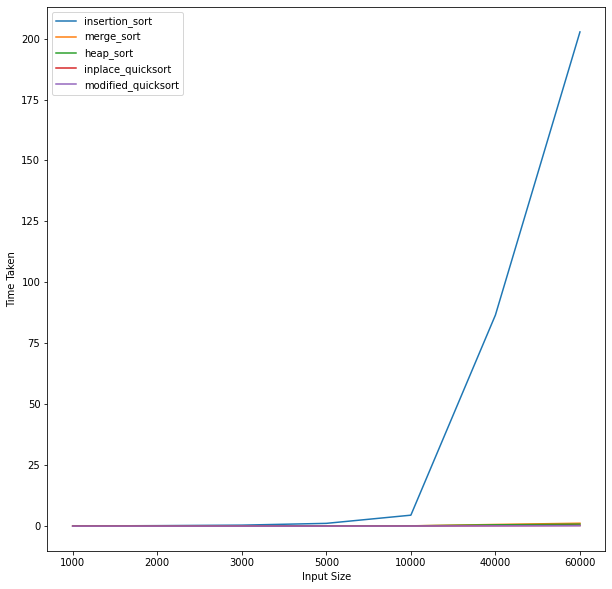

In [ ]:
# Generating plots for instruction 1
generate_plots(False)

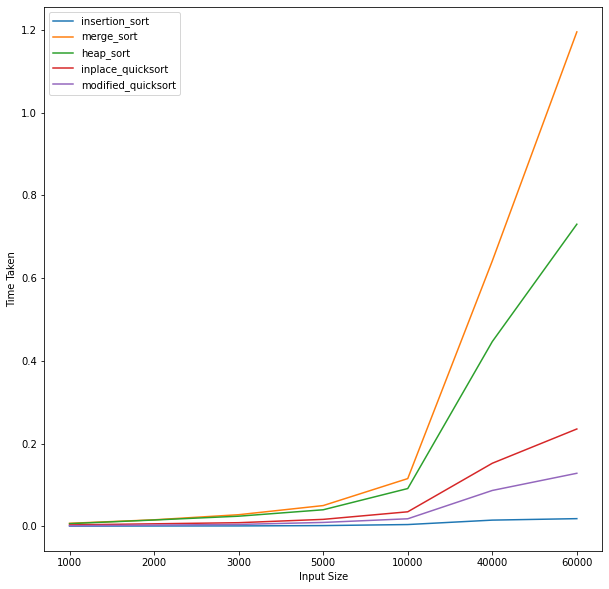

In [ ]:
# Generating plots when input array is already sorted
generate_plots(sorted=True)

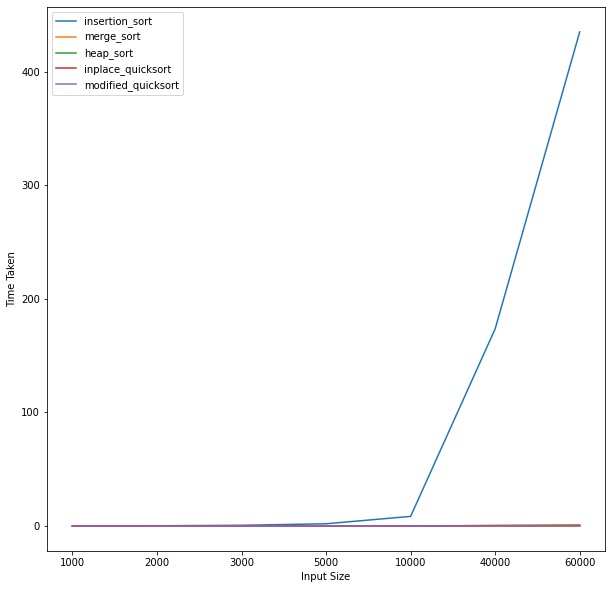

In [ ]:
# Generating plots when input array is reverse sorted
generate_plots(sorted=True, reverse=True)